In [10]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import neighbors


In [11]:

test=pd.read_excel('Test.xlsb')
train=pd.read_excel('Training.xlsb')

print(test.head())
print(train.head())



   ID         A         B      C        D         E         F   G     H  \
0   1  0.085400  0.085400  29.72   267.28  0.763657  0.763657  13  3.49   
1   2  0.223218  0.111609   0.00  1097.90  1.996182  0.998091  13  3.49   
2   3  0.048400  0.048400   0.00   399.90  0.499875  0.499875  13  1.99   
3   4  0.039560  0.039560  19.59   176.93  0.353860  0.353860  13  3.49   
4   5  0.231017  0.173263   0.00  1239.56  2.065933  1.549450  13  3.49   

       I  ...        P         Q   R           S    T    U    V    W   X  \
0  Woman  ...    1 One  property  No   No couple  Yes  Yes   No   No  No   
1  Woman  ...  3 Three  property  No       Works  Yes  Yes   No   No  No   
2    Man  ...   0 Zero  property  No  Unemployed  Yes  Yes   No   No  No   
3    Man  ...    1 One  property  No  Unemployed  Yes  Yes  Yes  Yes  No   
4  Woman  ...    1 One  property  No       Works  Yes  Yes   No   No  No   

  MARKER  
0      0  
1      1  
2      0  
3      0  
4      0  

[5 rows x 26 columns]
   

In [12]:

print(test.isna().sum())
print(train.isna().sum())

ID        0
A         0
B         0
C         0
D         0
E         0
F         0
G         0
H         0
I         0
J         0
K         0
L         0
M         0
N         0
O         0
P         0
Q         0
R         0
S         0
T         0
U         0
V         0
W         0
X         0
MARKER    0
dtype: int64
ID        0
A         0
B         0
C         0
D         0
E         0
F         0
G         0
H         0
I         0
J         0
K         0
L         0
M         0
N         0
O         0
P         0
Q         0
R         0
S         0
T         0
U         0
V         0
W         0
X         0
MARKER    0
dtype: int64


In [13]:
print(train)
print(train.info())
print(test)
print(test.info())

          ID         A         B       C       D         E         F   G  \
0          1  0.198778  0.099389    0.00  799.90  1.777556  0.888778  13   
1          2  0.043000  0.021264   49.97  173.03  0.384511  0.190143  13   
2          3  0.067073  0.067073    0.00  329.90  0.599818  0.599818  13   
3          4  0.052700  0.052700    0.00  235.65  0.471300  0.471300  13   
4          5  0.141880  0.141880    0.00  634.45  1.268900  1.268900  13   
...      ...       ...       ...     ...     ...       ...       ...  ..   
89729  89730  0.027941  0.014844   25.00  474.00  0.557647  0.296250  20   
89730  89731  0.120017  0.068581  179.96  720.03  1.200050  0.685743  10   
89731  89732  0.153033  0.122427   29.01  550.99  0.459158  0.367327   3   
89732  89733  0.107575  0.043030   53.82  215.18  0.537950  0.215180   5   
89733  89734  0.095750  0.095750   57.48  172.42  0.287367  0.287367   3   

          H      I  ...       P          Q    R          S    T    U    V  \
0      3.4

In [14]:
print(train)
print(train.describe(include='O').head())
print(test)
print(test.describe(include='O').head())

          ID         A         B       C       D         E         F   G  \
0          1  0.198778  0.099389    0.00  799.90  1.777556  0.888778  13   
1          2  0.043000  0.021264   49.97  173.03  0.384511  0.190143  13   
2          3  0.067073  0.067073    0.00  329.90  0.599818  0.599818  13   
3          4  0.052700  0.052700    0.00  235.65  0.471300  0.471300  13   
4          5  0.141880  0.141880    0.00  634.45  1.268900  1.268900  13   
...      ...       ...       ...     ...     ...       ...       ...  ..   
89729  89730  0.027941  0.014844   25.00  474.00  0.557647  0.296250  20   
89730  89731  0.120017  0.068581  179.96  720.03  1.200050  0.685743  10   
89731  89732  0.153033  0.122427   29.01  550.99  0.459158  0.367327   3   
89732  89733  0.107575  0.043030   53.82  215.18  0.537950  0.215180   5   
89733  89734  0.095750  0.095750   57.48  172.42  0.287367  0.287367   3   

          H      I  ...       P          Q    R          S    T    U    V  \
0      3.4

In [15]:
dataset = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

num_cols = dataset.select_dtypes(include=['int','float']).columns.to_list()
cat_cols = dataset.select_dtypes(include=['object','category']).columns.to_list()
num_cols = num_cols[1:11] # to avoid first and last columns

for item in cat_cols:
    print(item, dataset[item].unique(), sep='\n', end='\n\n')

I
['Woman' 'Man']

K
['Mogilev region' 'Minsk region' 'Vitebsk region' 'Brest region' 'Minsk'
 'Grodno region' 'Gomel region']

M
['NE employee' 'Pensioner' 'Head/Deputy head (organiz.)'
 'Head/Deputy head (division)' 'Enterpreneur']

N
['Secondary education (plus special education)'
 'Higher education (one or more)' 'Incomplete higher education'
 'Primary or lower secondary education']

O
['Married' 'Divorced/widow' 'Single/unmarried' 'Cohabitation']

P
['2 Two' '1 One' '0 Zero' '3 Three' 'More than 3']

Q
['property' 'otherwise' 'rent/hire']

R
['No' 'Yes']

S
['Works' 'No couple' 'Pensioner' 'Unemployed' 'Student']

T
['Yes' 'No']

U
['Yes' 'No']

V
['No' 'Yes' 'Few']

W
['Yes' 'No']

X
['No' 'Yes']



In [16]:
dataset.rename(columns={'I': 'sex'}, inplace=True)
dataset.rename(columns={'K': 'region'}, inplace=True)
dataset.rename(columns={'M': 'job'}, inplace=True)
dataset.rename(columns={'N': 'education'}, inplace=True)
dataset.rename(columns={'O': 'marital_status'}, inplace=True)
dataset.rename(columns={'P': 'children'}, inplace=True)
dataset.rename(columns={'Q': 'house_property'}, inplace=True)
dataset.rename(columns={'S': 'employment_status'}, inplace=True)
cat_cols = dataset.select_dtypes(include=['object','category']).columns.to_list()

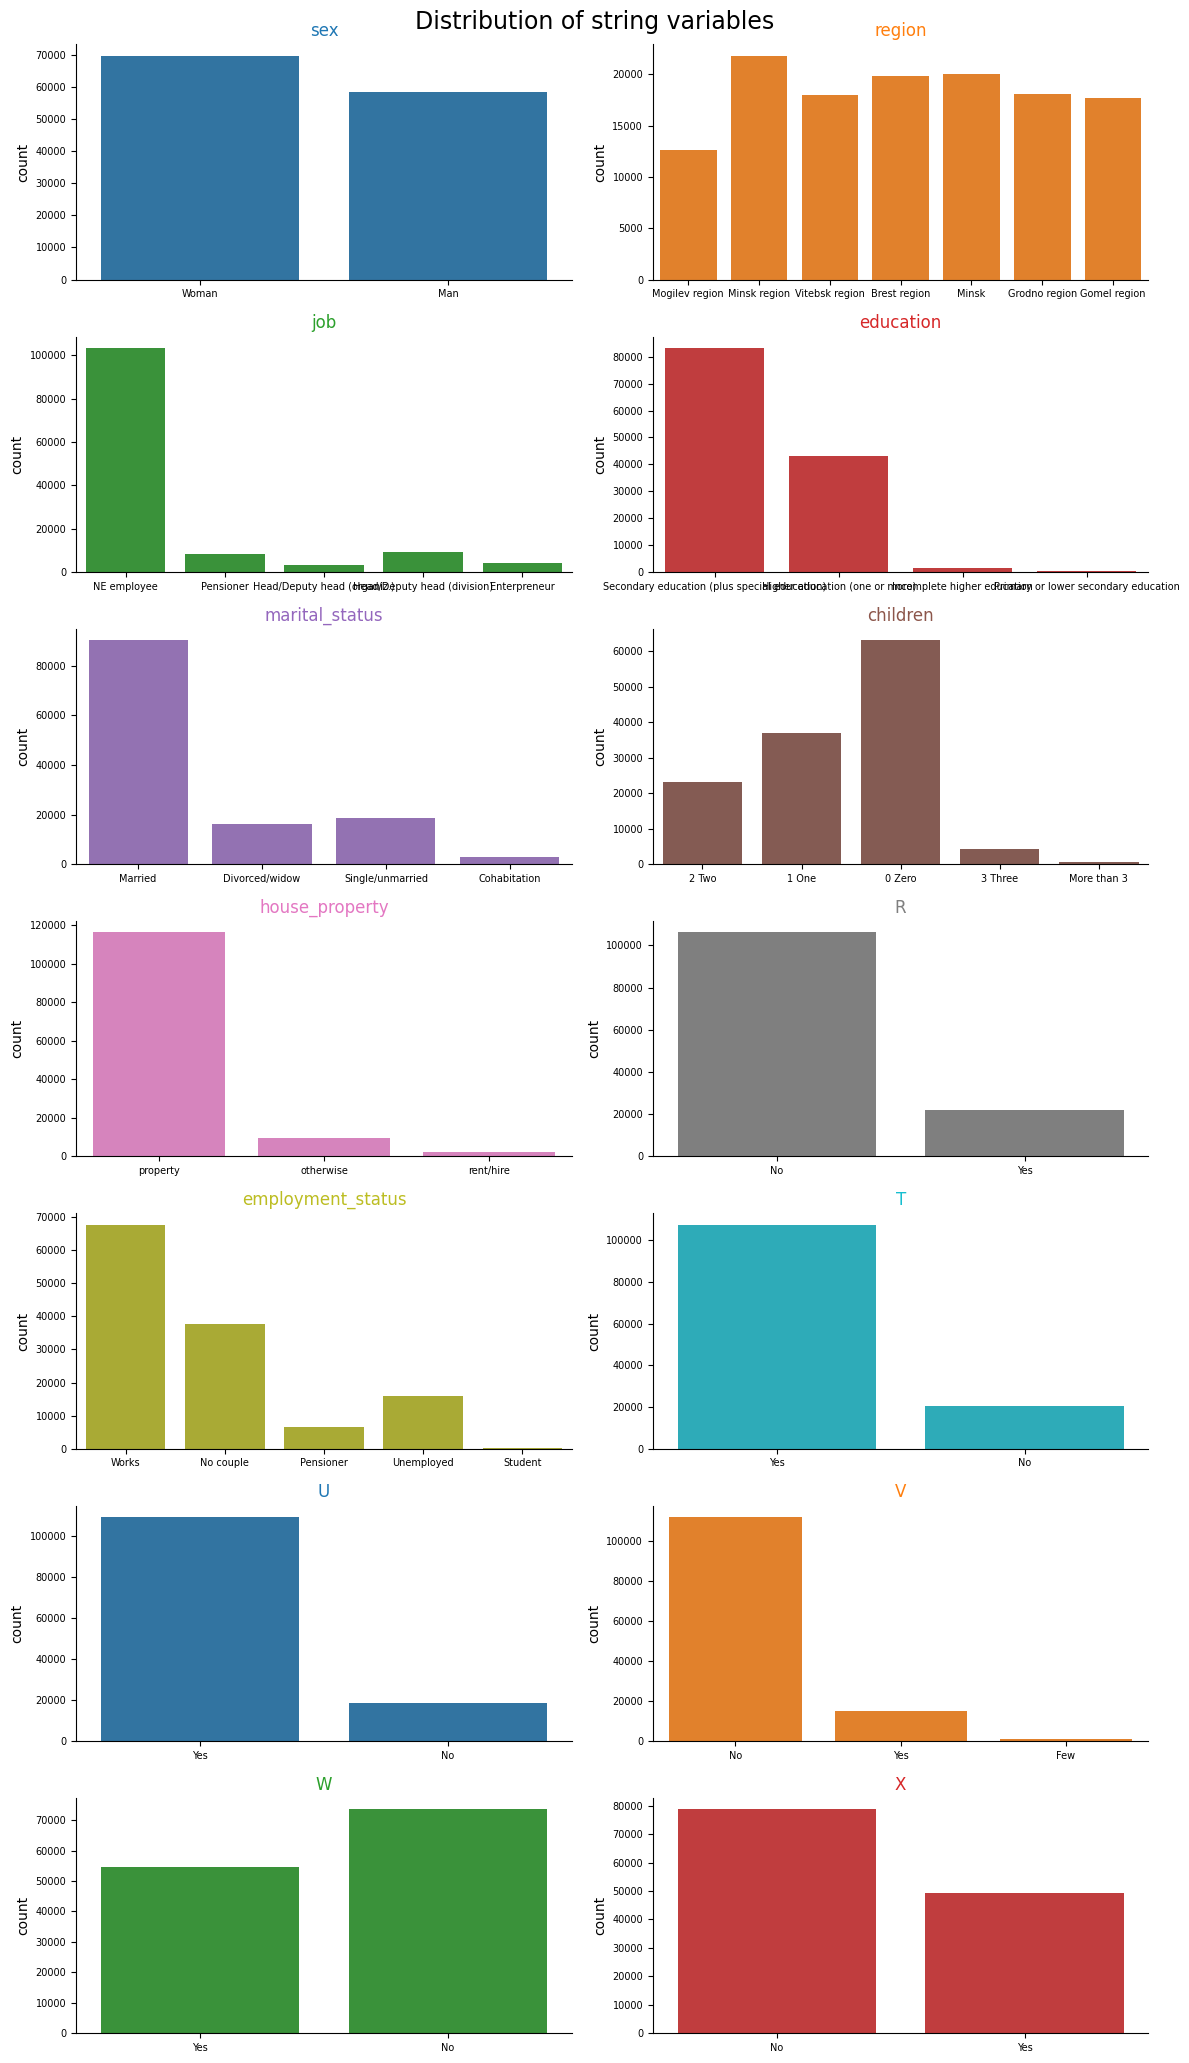

In [17]:
# We will visualize the distribution of these values
fig, ax = plt.subplots(7, 2, figsize=(12, 21))
ax = ax.flat

for i, col in enumerate(cat_cols):

    sns.countplot(dataset,
                 x=col,
                 color=(list(plt.rcParams['axes.prop_cycle']) * 2)[i]["color"],
#                  palette = 'mako',
                 ax=ax[i])

    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].tick_params(labelsize=7)
    ax[i].set_title(col,
                    fontsize=12,
                    color=(list(plt.rcParams['axes.prop_cycle']) *
                           2)[i]["color"]),
    ax[i].set_xlabel('')
#     if col == 'job' or col == 'region':
#         plt.xticks(rotation=15)

fig.suptitle('Distribution of string variables',
             fontsize=17)
fig.subplots_adjust(top=0.9)
fig.tight_layout()
plt.tight_layout()
plt.show()

# ignore the yes and no columns

In [18]:
dataset.head()


,ID,A,B,C,D,E,F,G,H,sex,...,children,house_property,R,employment_status,T,U,V,W,X,MARKER
0,1,0.198778,0.099389,0.00,799.90,1.777556,0.888778,13,3.49,Woman,...,2 Two,property,No,Works,Yes,Yes,No,Yes,No,0
1,2,0.043000,0.021264,49.97,173.03,0.384511,0.190143,13,3.49,Woman,...,2 Two,otherwise,No,Works,Yes,Yes,Yes,Yes,No,0
2,3,0.067073,0.067073,0.00,329.90,0.599818,0.599818,13,3.49,Woman,...,1 One,property,No,No couple,No,Yes,No,Yes,No,0
3,4,0.052700,0.052700,0.00,235.65,0.471300,0.471300,13,3.49,Woman,...,0 Zero,property,No,No couple,Yes,Yes,Few,Yes,No,0
4,5,0.141880,0.141880,0.00,634.45,1.268900,1.268900,13,3.49,Woman,...,0 Zero,property,No,No couple,Yes,No,No,No,No,0


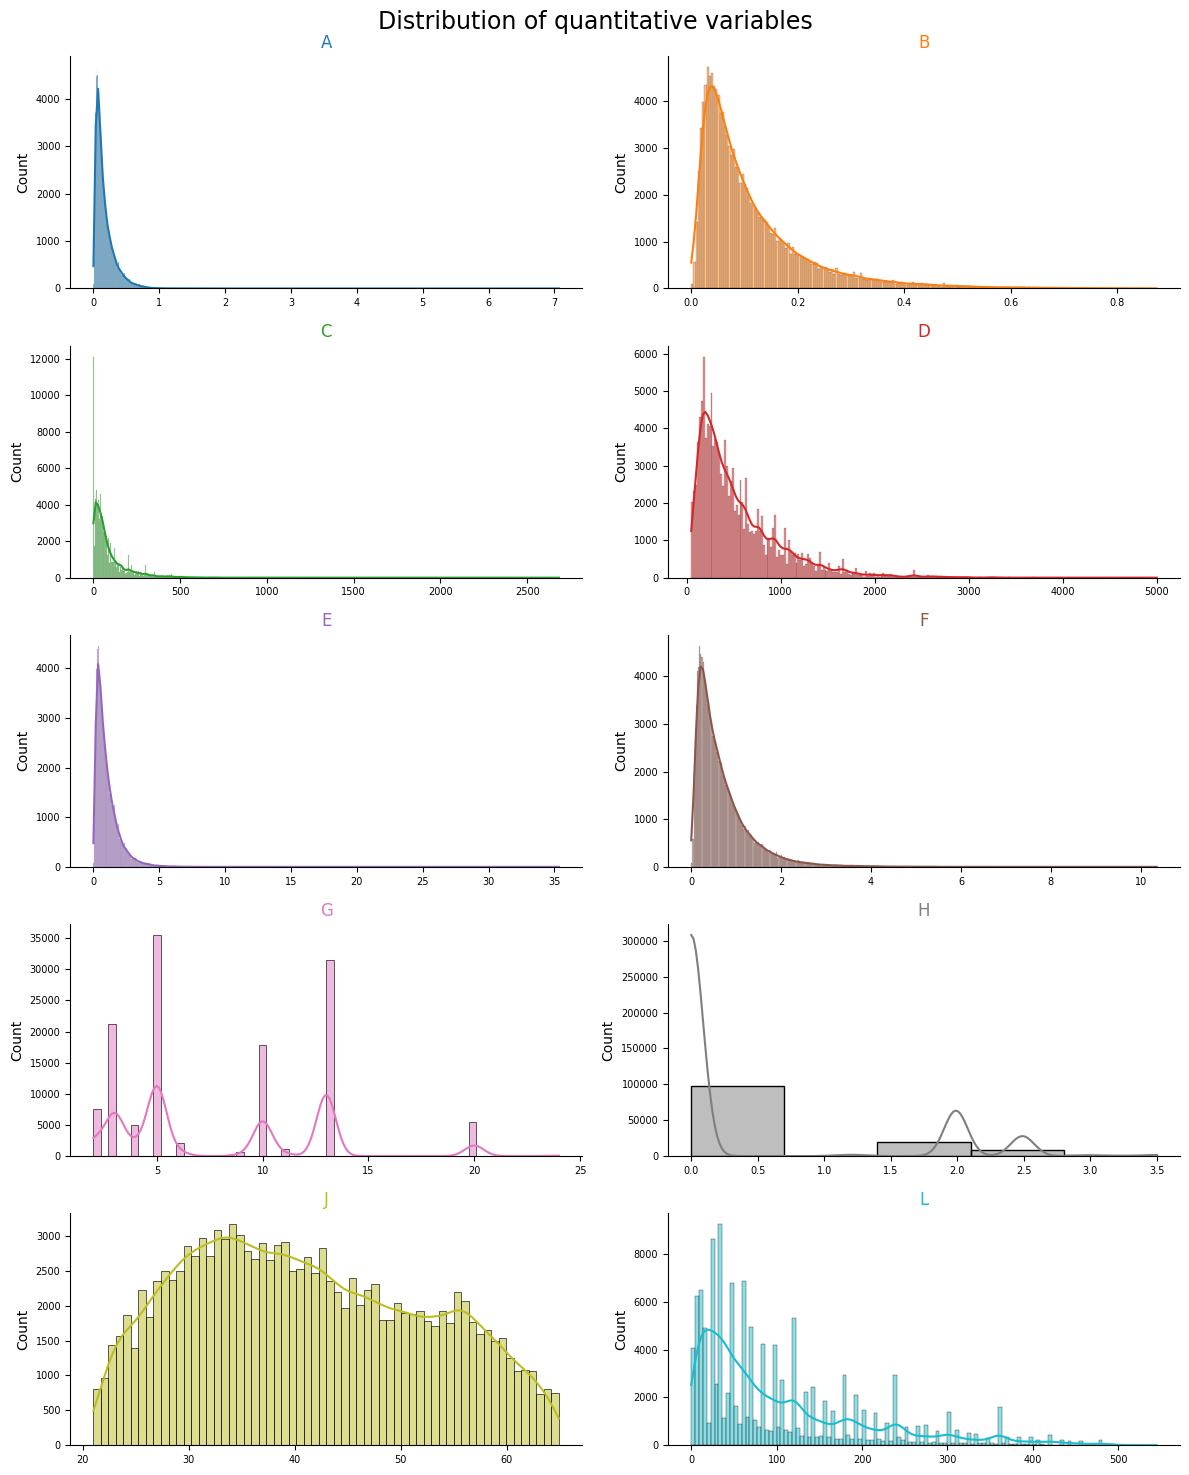

In [19]:
# We will visualize the distribution of our quantitative source variables.
fig, ax = plt.subplots(5, 2, figsize=(12, 15))
ax = ax.flat

for i, col in enumerate(num_cols):
    if col == 'H':
        bins_ = 5 
    else:
        bins_ = 'auto'

    sns.histplot(dataset,
                 x=col,
                 stat='count',
                 bins = bins_,
                 kde=True,
                 color=(list(plt.rcParams['axes.prop_cycle']) * 2)[i]["color"],
                 line_kws={'linewidth': 1.5},
                 ax=ax[i])

    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].tick_params(labelsize=7)
    ax[i].set_title(col,
                    fontsize=12,
                    color=(list(plt.rcParams['axes.prop_cycle']) *
                            2)[i]["color"]),
    ax[i].set_xlabel('')

fig.suptitle('Distribution of quantitative variables',
             fontsize=17)
fig.subplots_adjust(top=0.9)
fig.tight_layout()

plt.show()


<Axes: xlabel='MARKER', ylabel='count'>

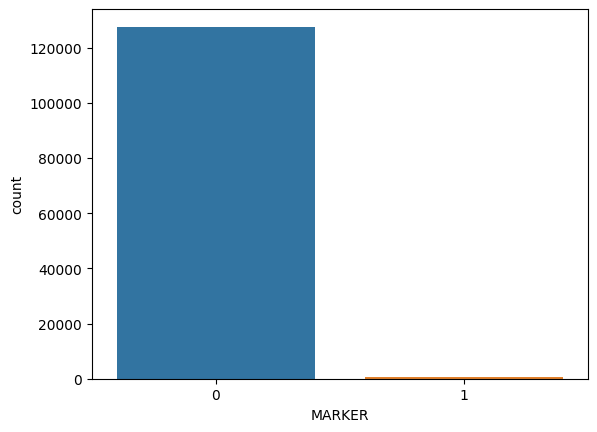

In [20]:
sns.countplot(data = dataset, x ="MARKER")

In [21]:

y_train = train["MARKER"]
y_test = test["MARKER"]

train_len=len(train)
test_len=len(test)
dataset_new = pd.get_dummies(dataset)
X_train = dataset_new[0:train_len]
X_test = dataset_new[train_len:]
X_train.head()

,ID,A,B,C,D,E,F,G,H,J,...,T_Yes,U_No,U_Yes,V_Few,V_No,V_Yes,W_No,W_Yes,X_No,X_Yes
0,1,0.198778,0.099389,0.00,799.90,1.777556,0.888778,13,3.49,33.750000,...,1,0,1,0,1,0,0,1,1,0
1,2,0.043000,0.021264,49.97,173.03,0.384511,0.190143,13,3.49,33.250000,...,1,0,1,0,0,1,0,1,1,0
2,3,0.067073,0.067073,0.00,329.90,0.599818,0.599818,13,3.49,38.583333,...,0,0,1,0,1,0,0,1,1,0
3,4,0.052700,0.052700,0.00,235.65,0.471300,0.471300,13,3.49,61.250000,...,1,0,1,1,0,0,0,1,1,0
4,5,0.141880,0.141880,0.00,634.45,1.268900,1.268900,13,3.49,48.583333,...,1,1,0,0,1,0,1,0,1,0


Training Accuracy: 0.9962
Test Accuracy: 0.9962


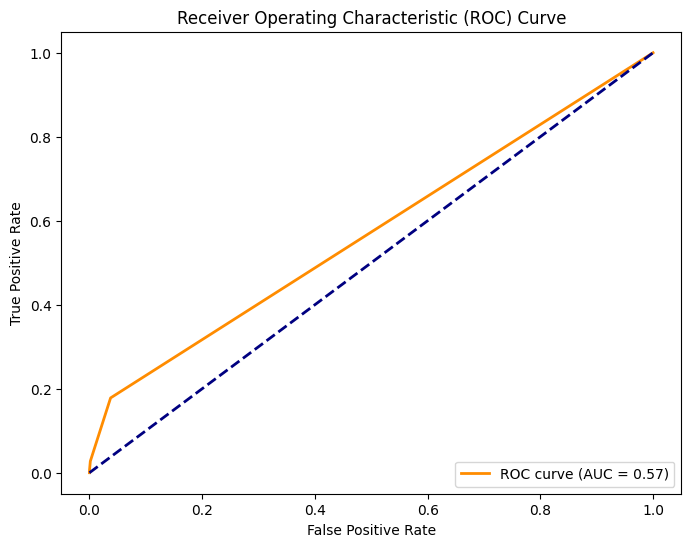

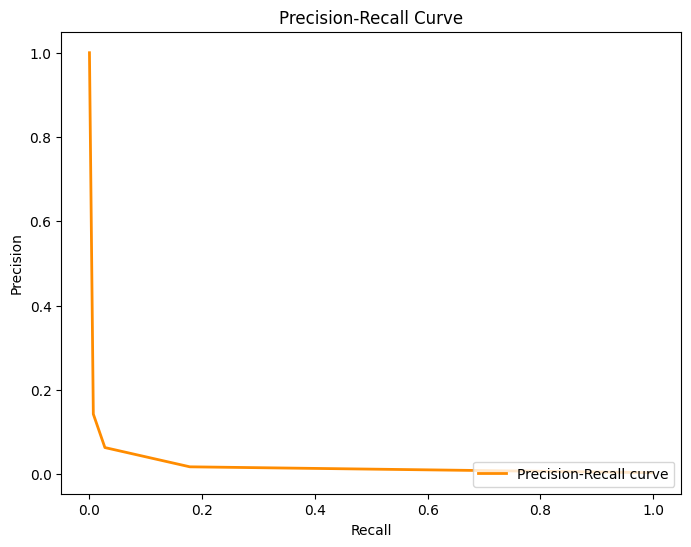

In [24]:
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, confusion_matrix
knn=neighbors.KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
train_predictions = knn.predict(X_train)

# Print accuracy on the training set
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Make predictions on the test set
test_predictions = knn.predict(X_test)

# Print accuracy on the test set
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, knn.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()



